# Setting up Workbook

## Import relevant files

In [1]:
import tools as tools
import classifier as classify
import fitting as fit
import BeatnoteMethods as bem
import BeatnotePipeline
from BeatnotePipeline import BeatnotePipeline

import os
import numpy as np
import matplotlib.pyplot as plt

## Define directories and load parent class

In [2]:
directory = 'data/'
folder = '2024-03-13/'
target_dir = 'output/'+'2024-03-13/'

beat = BeatnotePipeline(directory, folder, target_dir)

# Data Import and Classification

* All data matching relevant file extension is loaded into workbook
* All data is stored in data_dictionary according to filename
* Individual datasets can be accessed from data_dictionary using relevant filename
    * Background correction can be performed before analysis

In [3]:
beat.load_data(type='mat')

Available folders:  ['SBs_vs_lambda.mat', 'bg.mat']
Tstart =  [[0.]]
Tinterval =  [[1907.34863281]]
Length =  [[16380]]
0.0 1907.3486328125 16384
['__header__', '__version__', '__globals__', 'Tstart', 'Tinterval', 'ExtraSamples', 'RequestedLength', 'Length', 'A', 'Version']
Tstart =  [[0.]]
Tinterval =  [[1907.34863281]]
Length =  [[16380]]
0.0 1907.3486328125 16384
['__header__', '__version__', '__globals__', 'Tstart', 'Tinterval', 'ExtraSamples', 'RequestedLength', 'Length', 'A', 'Version']
Available data files in data_folder:  dict_keys(['SBs_vs_lambd', 'bg'])
dict_keys(['SBs_vs_lambd', 'bg'])
dict_keys(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60', '61', '62', '63', '64', '65',

dict_keys(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89', '90', '91', '92', '93', '94', '95', '96', '97', '98', '99', '100', '101', '102', '103', '104', '105', '106', '107', '108', '109', '110', '111', '112', '113', '114', '115', '116', '117', '118', '119', '120', '121', '122', '123', '124', '125', '126', '127', '128', '129', '130', '131', '132', '133', '134', '135', '136', '137', '138', '139', '140', '141', '142', '143', '144', '145', '146', '147', '148', '149', '150', '151', '152', '153', '154', '155', '156', 

In [4]:
data_dictionary = beat.data_dictionary
print(beat.data_dictionary.keys())

dict_keys(['SBs_vs_lambd', 'bg'])


## Selecting individual dataset to analyse

Select file from dictionary to analyse using the appropriate filename as a string

In [5]:
filename = 'SBs_vs_lambd'
datafile = beat.data_dictionary[filename]

Background correction if file available

dict_keys(['SBs_vs_lambd', 'bg'])


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


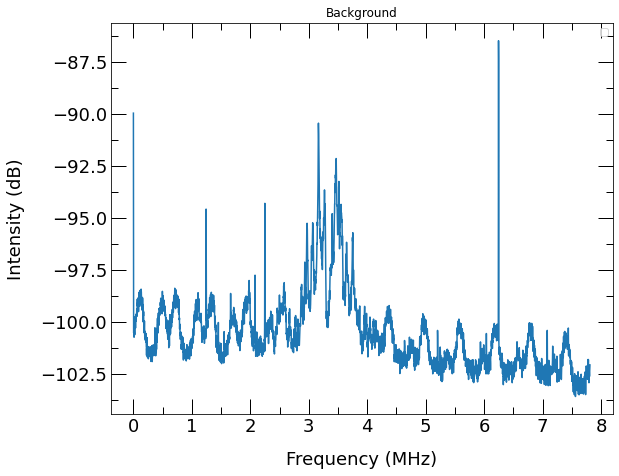

dict_keys(['SBs_vs_lambd', 'bg', 'SBs_vs_lambd_corr'])


In [6]:
background_filename = 'bg'
data_filename = 'SBs_vs_lambd'

beat.correct_file(data_filename, background_filename)
print(beat.data_dictionary.keys())

Plot index frame from selected datafile

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


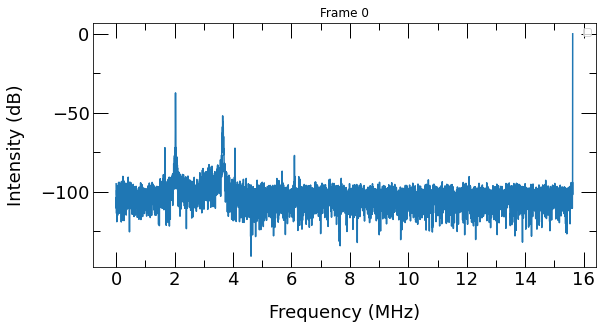

In [7]:
beat.plot_data(datafile, index = 0)

## Run multi-Lorentzian fitting cycle on data to extract beatnote characteristics
## Define cycle fit parameters

* Finds positions of peaks in each data frame
    * Relevant peak finding parameters should be adjusted for optimal peak detection
* Fits Lorentzian lineshape to in local domain of peak and with peak position fixed
* Saved all fit parameters in single fit_parameters.npy file
NOTE: n_avg is best kept below 20 to avoid loss of information

In [8]:
#Select range of frames to fit
n_frames = [0, 1]
#Select frequency domain to fit
crop = [0, -1]
#Take moving average of data for fitting - default = 1 for NO averaging
n_avg = 10
#Define peak finder parameters - Adjust for optimal peak detection
width = 10
height = -50
distance = 10

## Run cycle fit

Fitting frame number  0
0  peak maxima found at t =  []


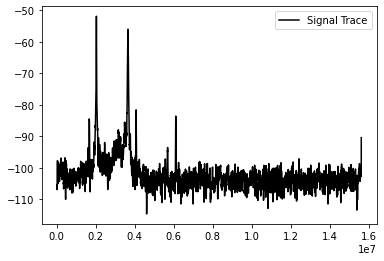

In [9]:
#Set plot = False to speed up cycle fit
plot = True

beat.process_data(datafile, crop, n_avg, width, height, distance, n_frames, plot)


Fit parameters automatically saved as binary [frames]_fit_parameters.npy file in output directory

Combine all fit parameters for given dataset in single fit_parameters.npy file

## Load fit parameters

In [11]:
fit_params_list = beat.load_fit_parameters()

Fit parameters available to load:  ['[0, 1]_fit_parameters.npy', '[0, 10]_fit_parameters.npy', '[0, 15]_fit_parameters.npy', '[2000, 2001]_fit_parameters.npy']


Select particular file to analyse

In [12]:
fit_params = fit_params_list['[0, 10]_fit_parameters.npy']
frames, amplitudes, frequencies, widths, fits = fit_params

# Analyse beatnote parameters

## Plot timelines of beatnote parameters

In [ ]:
beat.plot_timelines(fit_params, variable_type=None)

## Analyse individual beatnote parameters

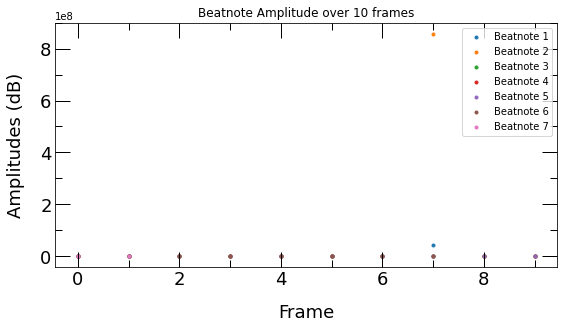

In [14]:
x_plot = frames
y_plot = amplitudes

x_label = 'Frame'
y_label = 'Amplitudes (dB)'
title = 'Beatnote Amplitude over {} frames'.format(str(len(x_plot)))
save = False
                                                   
tools.xy_plot( [x_plot, y_plot], type='beat_timeline', label_variable = ['Beatnote '+str(i+1) for i in range(len(y_plot))], aspect = 0.5, yerror = None, x_label = x_label, y_label = y_label, title = title, box = False, save = save, target_dir = target_dir)

7
Standard deviation =  0.43998605990236755  MHz


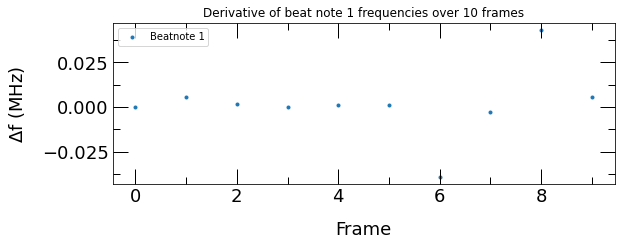

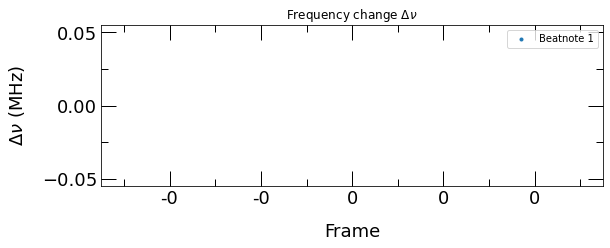

[] []


In [23]:
selected_times, selected_beats = bem.select_higher_beatnotes(frames, frequencies, beatnote_index=1, sigma =0.1, target_dir=target_dir)

print('Selected beatnote shifts = ', selected_beats)

# Analyse beatnote frequency shifts
* Selects frequency shifts above a certain number of standard deviations
* Plot histogram of shift size

7
Standard deviation =  0.43998605990236755  MHz


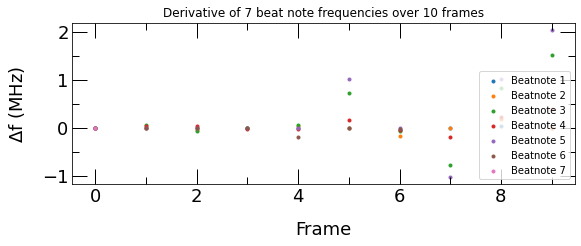

/Users/sabrinaperrenoud/opt/anaconda3/lib/python3.9/site-packages/numpy/lib/histograms.py:906: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


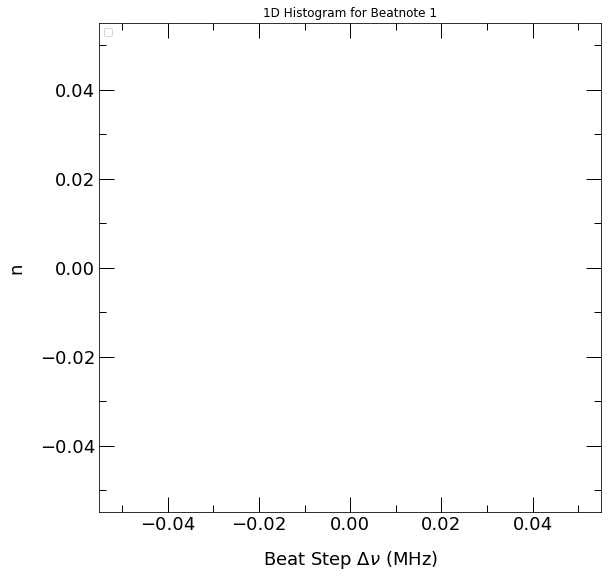

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


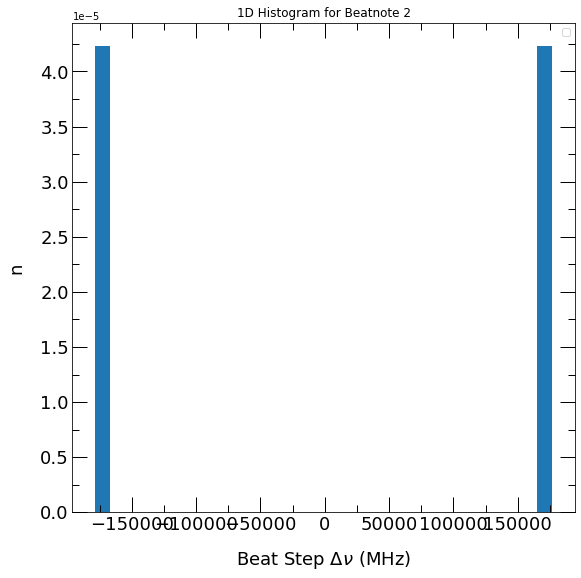

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


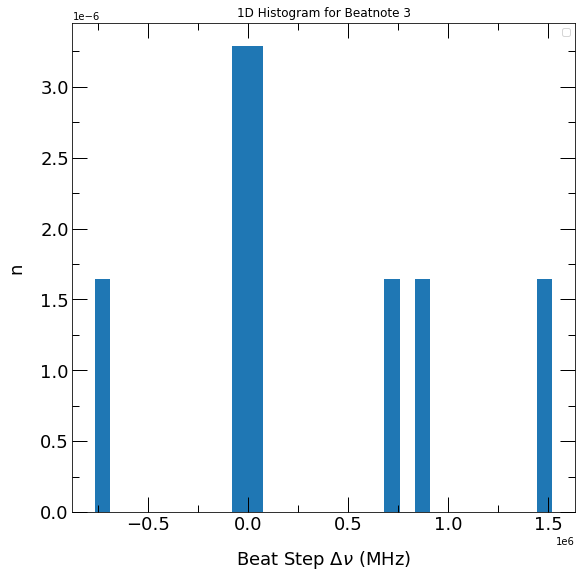

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


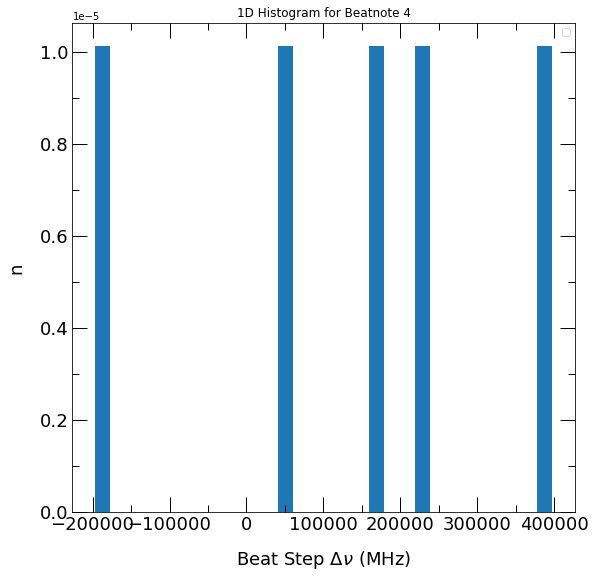

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


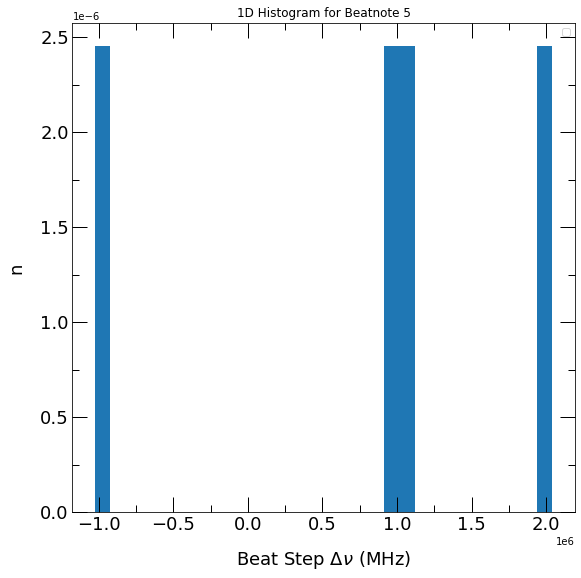

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


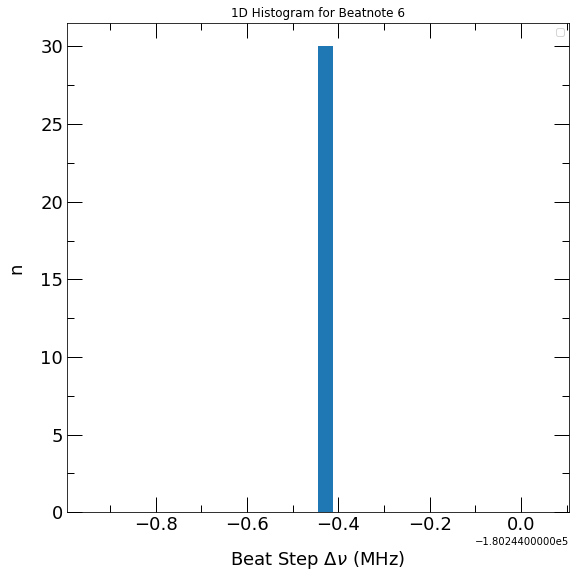

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


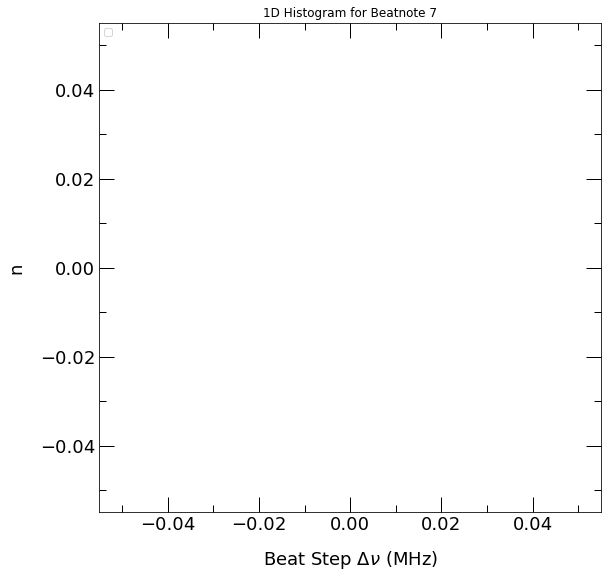

In [24]:
beat.get_beatnote_stats(frames, frequencies, beatnote_index=None, sigma = 3, n_bins = 30)

# Blank Cells
Feel free to call further functions and data analysis methods